In [1]:
"""
Template for week 12 project in Data Visualization

Plot various visualizations of digital elavation model data for Grand Canyon
https://pubs.usgs.gov/ds/121/grand/grand.html
"""

import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# Resource paths
PLOTS_PATH = "plots/"
DATA_PATH = "data/"
GC_DEM = DATA_PATH + "gc_dem.tiff"

DEMS = {}

# Sub-regions of interest defined as numpy slice objects
ALL = np.s_[:, :]
REGION1 = np.s_[1400:1900, 1200:1700]
REGION2 = np.s_[1250:1750, 1750:2250]

# Min and max heights in meters for Grand Canyon DEM
ZMIN = 489
ZMAX = 2770

# Custom colorscale/colormap for elevations
ELEV = ("rgb(5,10,172)",
        "rgb(34,46,193)",
        "rgb(63,83,215)",
        "rgb(92,119,236)",
        "rgb(134,155,228)",
        "rgb(190,190,190)",
        "rgb(220,170,132)", 
        "rgb(230,145,90)",
        "rgb(213,100,69)",
        "rgb(195,55,49)",
        "rgb(178,10,28)")


In [3]:
############################################################
# Part 1 - Load, plot, and contour images

def load_dem(dem_file):
    """
    Input: String dem_file
    
    Output: Numpy array of uint16 heights
    
    NOTE: The loaded height are in decimeters. Divide by 10 to
    return integer heights in meters
    """
    
    output = plt.imread(dem_file) / 10
    output = output.astype(np.uint16)
    
    return output

In [4]:
def test_load_dem():
    """ Test load_dem() and create some example dems"""
    
    x_grid, y_grid = np.meshgrid(np.linspace(-1, 1, 9), np.linspace(-1, 1, 9))
    ridge1 = np.minimum(x_grid - y_grid, -x_grid + y_grid)
    ridge2 = np.minimum(x_grid + y_grid, -x_grid - y_grid)
    DEMS["ridge"] = np.maximum(ridge1, ridge2)
    
    DEMS["full"] = load_dem(GC_DEM)
    print(DEMS["full"].shape)
    DEMS["region1"] = DEMS["full"][REGION1]
    DEMS["region2"] = DEMS["full"][REGION2]

test_load_dem()

(2000, 3000)


In [5]:
def plot_image(image_array, title="Image plot of a DEM", vmin=None, vmax=None, cmap=None):
    """
    Input: Numpy array image_array, optional string title, optional 
    integers vmin, vmax, optional colormap cmap
    
    Output: matplotlib figure consisting of a plot of the 
    image with values in image_array
    """
    
    fig, axs = plt.subplots()
    
    img = axs.imshow(image_array, cmap=cmap, vmin=vmin, vmax=vmax)
    plt.title(title)
    
    divider = make_axes_locatable(axs)
    cax = divider.append_axes("right", size="5%", pad=0.2)
    plt.colorbar(img, cax=cax)
    
    return fig

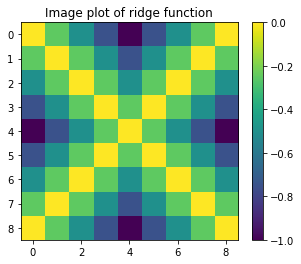

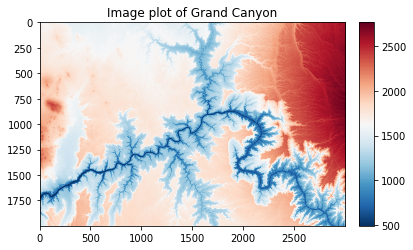

In [6]:
def test_plot_image():
    """ Test plot_image() """

    plot_image(DEMS["ridge"], "Image plot of ridge function")
    plot_image(DEMS["full"], "Image plot of Grand Canyon", vmin=ZMIN, vmax=ZMAX, cmap="RdBu_r")
    
test_plot_image()

In [7]:
def plot_contour(dem_array, title="Contour plot of a DEM", filled=False, 
                 vmin=None, vmax=None, cmap=None):
    """
    Input: Numpy array dem_array, optional string title, optional boolean filled
    optional integers vmin, vmax, optional colormap cmap
    
    Output: mapltolib figure consisting of a plot of the contours 
    of image in dem_array, use contour() or contour() based on value of filled
    """
    
    fig, axs = plt.subplots()
    if filled:
        img = axs.contourf(np.flipud(dem_array), cmap=cmap, vmin=vmin, vmax=vmax)
    else:
        img = axs.contour(np.flipud(dem_array), cmap=cmap, vmin=vmin, vmax=vmax)
        
    plt.title(title)
    fig.colorbar(img, ax=axs)
    axs.set_aspect("equal")
    
#     divider = make_axes_locatable(axs)
#     cax = divider.append_axes("right", size="5%", pad=0.2)
#     plt.colorbar(im, cax=cax)
    
    return fig

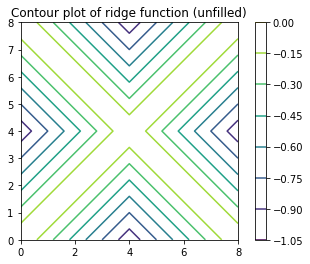

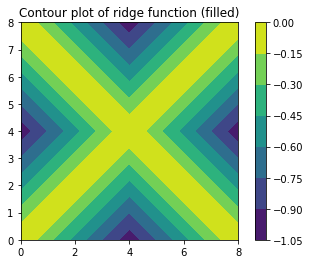

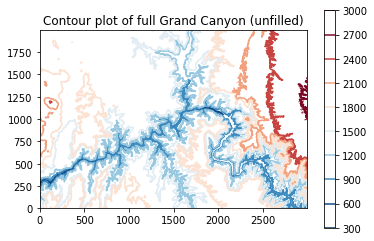

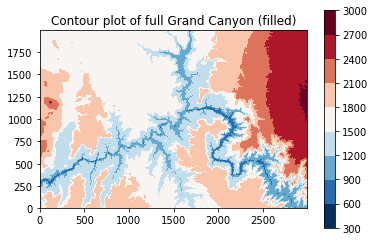

In [8]:
def test_plot_contour():
    """ Test plot_contour() """

    
    plot_contour(DEMS["ridge"], "Contour plot of ridge function (unfilled)", filled=False)
    plot_contour(DEMS["ridge"], "Contour plot of ridge function (filled)", filled=True)
    
    plot_contour(DEMS["full"], "Contour plot of full Grand Canyon (unfilled)",
                 filled=False, vmin=ZMIN, vmax=ZMAX, cmap="RdBu_r")
    plot_contour(DEMS["full"], "Contour plot of full Grand Canyon (filled)",
                 filled=True, vmin=ZMIN, vmax=ZMAX, cmap="RdBu_r")

test_plot_contour()

In [9]:
####################################################################
# Part 2 - Compute and plot features of dems

def compute_features(dem_array):
    """
    Input: Numpy array dem_array
    
    Output: Numpy array of float64 with boundary rows and columns trimmed
    """    
    result = dem_array.copy()
    for idx_i in range(1, result.shape[0] - 1):
        for idx_j in range(1, result.shape[1] - 1):
            part_1 = abs(dem_array[idx_i - 1][idx_j] 
                         - 2 * dem_array[idx_i][idx_j] + dem_array[idx_i + 1][idx_j])
            part_2 = abs(dem_array[idx_i][idx_j - 1] 
                         - 2 * dem_array[idx_i][idx_j] + dem_array[idx_i][idx_j + 1])
            result[idx_i][idx_j] = part_1 + part_2

    result = result[1:-1, 1:-1]
    result = result.astype(float)

    return result

In [10]:
def test_compute_features():
    """ Test compute_features() """    

    compute_features(DEMS["ridge"])
    compute_features(DEMS["region1"])
    compute_features(DEMS["region2"])
    
    
test_compute_features()

In [11]:
def plot_features(dem_array, title="DEM and its features", vmin=None, vmax=None, cmap=None):
    """
    Input: Numpy array dem_array, optional string title,
    optional integers vmin, vmax, optional colormap cmap
    
    Output: matplotlib figure consisting of a 1 x 2 array 
    of plots of DEM image and its features
    """
    
    fig, (ax0, ax1) = plt.subplots(1, 2)
    ax0.imshow(dem_array, cmap=cmap, vmin=vmin, vmax=vmax)
    ax1.imshow(compute_features(dem_array), cmap="Greys_r", vmin=None, vmax=None)
    plt.title(title)
    ax0.set_axis_off()
    ax1.set_axis_off()

    return fig

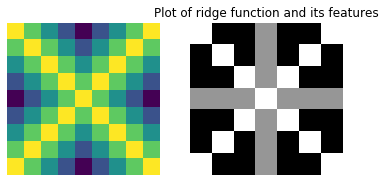

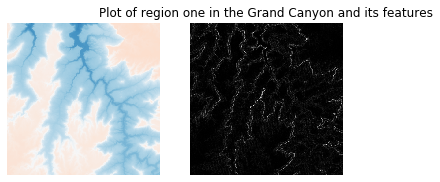

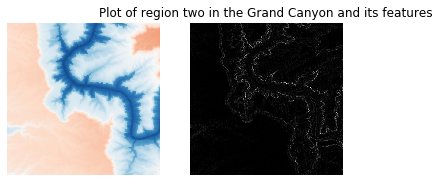

In [12]:
def test_plot_features():
    """ Test plot_features() """
    
    plot_features(DEMS["ridge"], "Plot of ridge function and its features")
    plot_features(DEMS["region1"], "Plot of region one in the Grand Canyon and its features", 
                 vmin=ZMIN, vmax=ZMAX, cmap="RdBu_r")
    plot_features(DEMS["region2"], "Plot of region two in the Grand Canyon and its features", 
                 vmin=ZMIN, vmax=ZMAX, cmap="RdBu_r")

test_plot_features()

In [13]:
#######################################################################
# Part 3 - Compute downsampled version of dem and plot as a 3D elevation map

def downsample_dem(dem_array):
    """
    Input: Numpy array dem_array whose dimensions are divisible by two
    
    Output: Numpy array of integers with each dimension being halved
    """
    d_1 = dem_array[::2, ::2]   # 2i, 2j
    d_2 = dem_array[::2, 1::2]  # 2i+1, 2j
    d_3 = dem_array[1::2, ::2]  # 2i, 2j+1
    d_4 = dem_array[1::2, 1::2] # 2i+1, 2j+1
    
    result = (d_1 + d_2 + d_3 + d_4) / 4
    result = result.astype(np.int64)
    
    return result

In [14]:
def test_downsample_dem():
    """ Test downsample_dem() """
    
    downsample_dem(np.array([[1, 2, 4, 5], [3, 4, 6, 8], [5, 3, 1, -1], [2, 3, 5, 0]]))
    downsample_dem(DEMS["region1"])
    downsample_dem(DEMS["region2"])
    DEMS["full_downsampled"] = downsample_dem(DEMS["full"])
    
test_downsample_dem()

In [15]:
def plot_elevation(dem_array, cmin=None, cmax=None, title="Grand Canyon surface plot"):
    """
    Input: Numpy array dem_array, optional numbers cmin, cmax, optional string title
    
    Output: plotly figure corresponding to 3D elevation map of dem_array using the 
    colorscale ELEV with specified mininum and maximum elevations using go.Surface()
    
    The aspect ratio of the 3D plot should preserve the relative lengths of the x and y 
    coordinate ranges while the length of the z range should be scaled to be
    10% of the minimum of the lengths of the x and y ranges.
    
    NOTE: The function should also write the figure to HTML in the files linked in the
    markdown cell at the end of this notebook.
    """ 
    
    y_axis, x_axis = dem_array.shape 
    
    #compare x and y 
    min_axis = min(x_axis, y_axis)
    x_ratio = x_axis / min_axis
    y_ratio = y_axis / min_axis
    
    fig = go.Figure(data=[go.Surface(z=np.flipud(dem_array), cmax=cmax,
                                     cmin=cmin, colorscale=ELEV)], 
                    layout=dict(title=title,
                                scene={"aspectratio": {"x": x_ratio, "y": y_ratio, "z": 0.1}},
                                scene_camera=dict(eye=dict(x=0, y=-1, z=1))
                                
                               ))
    
    fig.write_html("plots/" + title + ".html")
    
    return fig

In [16]:
def test_plot_elevation():
    """ Test plot_elevation() """

    title = "3D elevaton plot of ridge function"
    fig = plot_elevation(DEMS["ridge"], title=title)
    
    title = "3D elevaton plot of downsampled Grand Canyon"
    plot_elevation(DEMS["full_downsampled"], cmin=ZMIN, cmax=ZMAX, title=title)
    
    title = "3D elevation plot of region one of Grand Canyon"
    plot_elevation(DEMS["region1"], cmin=ZMIN, cmax=ZMAX, title=title)
    
    title = "3D elevation plot of region two of Grand Canyon"
    plot_elevation(DEMS["region2"], cmin=ZMIN, cmax=ZMAX, title=title)
    
test_plot_elevation()

## Links to four plots produced by `test_plot_elevation()`

* [3D elevaton plot of ridge function](plots/3D%20elevaton%20plot%20of%20ridge%20function.html)
* [3D elevaton plot of downsampled Grand Canyon](plots/3D%20elevaton%20plot%20of%20downsampled%20Grand%20Canyon.html)
* [3D elevation plot of region one of Grand Canyon](plots/3D%20elevation%20plot%20of%20region%20one%20of%20Grand%20Canyon.html)
* [3D elevation plot of region two of Grand Canyon](plots/3D%20elevation%20plot%20of%20region%20two%20of%20Grand%20Canyon.html)